<a href="https://colab.research.google.com/github/myDSMLProjects/Deep-Learning/blob/master/ROC_curve_for_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
from scipy.stats import zscore
X_columns = df.columns.drop('diagnosis').drop('id')

for col in X_columns:
  df[col] = zscore(df[col])

X = df[X_columns].values
y = df['diagnosis'].map({'M':1, 'B':0}).values

In [9]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, epochs=1000)

Epoch 1/1000
14/14 - 0s - loss: 0.6566 - accuracy: 0.8521 - val_loss: 0.5957 - val_accuracy: 0.9510
Epoch 2/1000
14/14 - 0s - loss: 0.5094 - accuracy: 0.9319 - val_loss: 0.3768 - val_accuracy: 0.9580
Epoch 3/1000
14/14 - 0s - loss: 0.2817 - accuracy: 0.9437 - val_loss: 0.1679 - val_accuracy: 0.9580
Epoch 4/1000
14/14 - 0s - loss: 0.1528 - accuracy: 0.9507 - val_loss: 0.0922 - val_accuracy: 0.9720
Epoch 5/1000
14/14 - 0s - loss: 0.1049 - accuracy: 0.9648 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 6/1000
14/14 - 0s - loss: 0.0892 - accuracy: 0.9812 - val_loss: 0.0618 - val_accuracy: 0.9790
Epoch 7/1000
14/14 - 0s - loss: 0.0706 - accuracy: 0.9812 - val_loss: 0.0570 - val_accuracy: 0.9930
Epoch 8/1000
14/14 - 0s - loss: 0.0707 - accuracy: 0.9789 - val_loss: 0.0543 - val_accuracy: 0.9930
Epoch 9/1000
14/14 - 0s - loss: 0.0794 - accuracy: 0.9812 - val_loss: 0.0505 - val_accuracy: 0.9930
Epoch 10/1000
14/14 - 0s - loss: 0.0562 - accuracy: 0.9812 - val_loss: 0.0550 - val_accuracy: 0.9860

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(pred, y):
  fpr, tpr, _ = roc_curve(y, pred)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label='ROC Curve (area=%.2f)' % roc_auc)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operator Characteristics (ROC)')
  plt.legend(loc='lower right')
  plt.show()

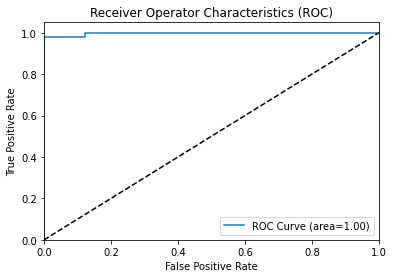

In [18]:
pred = model.predict(X_test)
plot_roc(pred,y_test)

Multi class classification

In [35]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

df.head(2)

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c


In [36]:
df['product'].unique()

array(['b', 'c', 'a', 'd', 'f', 'e', 'g'], dtype=object)

In [0]:
# Job, Area and Product are categorical variables, Whereas the product is the target
# Therefore Job and Are are to dummy treated

# Generate dummies fo Job
df = pd.concat([df, pd.get_dummies(df['job'], prefix='job')], axis=1)
df.drop(['job'], axis=1, inplace=True)

# Generate dummies for Area
df = pd.concat([df, pd.get_dummies(df['area'], prefix='area')], axis=1)
df.drop(['area'], axis=1, inplace=True)

# Treat missing values for Income
med = df.income.median()
df['income'] = df['income'].fillna(med)

#Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['subscriptions'] = zscore(df['subscriptions'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['dist_healthy'] = zscore(df['dist_healthy'])
df['dist_unhealthy'] = zscore(df['dist_unhealthy'])

# Convert to numpy for classification
X_columns = df.columns.drop('product').drop('id')
X = df[X_columns].values
dummies = pd.get_dummies(df['product'])
products = dummies.columns
y = dummies.values

In [46]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(y_train.shape[1], activation='softmax', kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2, epochs=1000)

Epoch 1/1000
47/47 - 0s - loss: 1.6196 - accuracy: 0.4613 - val_loss: 1.1044 - val_accuracy: 0.4980
Epoch 2/1000
47/47 - 0s - loss: 1.0360 - accuracy: 0.5600 - val_loss: 0.9264 - val_accuracy: 0.6600
Epoch 3/1000
47/47 - 0s - loss: 0.8470 - accuracy: 0.6853 - val_loss: 0.8206 - val_accuracy: 0.6680
Epoch 4/1000
47/47 - 0s - loss: 0.7681 - accuracy: 0.6973 - val_loss: 0.7914 - val_accuracy: 0.6700
Epoch 5/1000
47/47 - 0s - loss: 0.7355 - accuracy: 0.7007 - val_loss: 0.7733 - val_accuracy: 0.6900
Epoch 6/1000
47/47 - 0s - loss: 0.7171 - accuracy: 0.7060 - val_loss: 0.7783 - val_accuracy: 0.6960
Epoch 7/1000
47/47 - 0s - loss: 0.6986 - accuracy: 0.7060 - val_loss: 0.7631 - val_accuracy: 0.6920
Epoch 8/1000
47/47 - 0s - loss: 0.6842 - accuracy: 0.7040 - val_loss: 0.7563 - val_accuracy: 0.6940
Epoch 9/1000
47/47 - 0s - loss: 0.6710 - accuracy: 0.7113 - val_loss: 0.7494 - val_accuracy: 0.6820
Epoch 10/1000
47/47 - 0s - loss: 0.6648 - accuracy: 0.7140 - val_loss: 0.7480 - val_accuracy: 0.7000

In [0]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

In [48]:
from sklearn import metrics

y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.706


Classification Log Loss

In [50]:
from IPython.display import display

# Dont display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(X_test)

print('Numpy array of predictions')
display(pred[0:5])

print('As per probability')
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

# raw probabilities to chosen class (highest probability)
pred = np.argmax(pred,axis=1) 

Numpy array of predictions


array([[0.    , 0.0783, 0.699 , 0.2221, 0.0005, 0.    , 0.    ],
       [0.    , 0.6893, 0.3104, 0.    , 0.0003, 0.    , 0.    ],
       [0.    , 0.7457, 0.2498, 0.0005, 0.0039, 0.0001, 0.    ],
       [0.    , 0.2783, 0.7099, 0.0098, 0.0019, 0.    , 0.    ],
       [0.    , 0.0082, 0.6191, 0.3727, 0.    , 0.    , 0.    ]],
      dtype=float32)

As per probability
[ 0.0003  7.8317 69.9034 22.2088  0.0549  0.0007  0.0001]
Log loss score: 0.7334455452924594
